# 回测核心知识

##  QA回测的核心是两个类

```
QA_BacktestBroker
QA_Account
```

##  回测数据的引入/迭代

```
QA.QA_fetch_stock_day_adv
QA.QA_fetch_stock_min_adv
```

##  指标的计算

```
DataStruct.add_func
```

##  对于账户的灵活运用

```
QA_Account
QA_Risk
QA_Portfolio
QA_PortfolioView
QA_User
```

# STEP1 初始化账户,初始化回测broker

In [1]:
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')

In [7]:
Account=QA.QA_Account(user_cookie="user_test_1", portfolio_cookie="port_test_1")

In [8]:
Broker=QA.QA_BacktestBroker()

In [9]:
import warnings

In [10]:
# 重设账户初始资金

Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [11]:
Account.init_assets

{'cash': 200000, 'hold': {}}

# SETP2:引入回测的市场数据

In [12]:
# QA.QA_fetch_stock_list_adv().code.tolist()
# QA.QA_fetch_stock_block_adv().get_block('云计算').code
#codelist=QA.QA_fetch_stock_block_adv().get_block('云计算').code
codelist=['000001']

In [13]:
data=QA.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')

In [14]:
data=data.to_qfq()

# STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 QUANTAXIS的指标系统

In [15]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

In [16]:
ind=data.add_func(MACD_JCSC)

In [23]:
type(ind)

pandas.core.frame.DataFrame

In [21]:
ind.xs(codelist[0],level=1)['2018-01']

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,,,,,,
2018-01-02,0.105987,0.098843,0.014288,1,0,0
2018-01-03,0.096125,0.098299,-0.004348,0,1,0
2018-01-04,0.081201,0.094880,-0.027357,0,0,0
2018-01-05,0.072398,0.090383,-0.035971,0,0,0
2018-01-08,0.038736,0.080054,-0.082635,0,0,0
2018-01-09,0.021078,0.068259,-0.094362,0,0,0
2018-01-10,0.036762,0.061959,-0.050395,0,0,0
2018-01-11,0.043289,0.058225,-0.029873,0,0,0
2018-01-12,0.059356,0.058451,0.001810,1,0,0


In [24]:
ind.loc['2018-01',slice(None)]

,,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,code,,,,,,
2018-01-02,000001,0.105987,0.098843,0.014288,1,0,0
2018-01-03,000001,0.096125,0.098299,-0.004348,0,1,0
2018-01-04,000001,0.081201,0.094880,-0.027357,0,0,0
2018-01-05,000001,0.072398,0.090383,-0.035971,0,0,0
2018-01-08,000001,0.038736,0.080054,-0.082635,0,0,0
2018-01-09,000001,0.021078,0.068259,-0.094362,0,0,0
2018-01-10,000001,0.036762,0.061959,-0.050395,0,0,0
2018-01-11,000001,0.043289,0.058225,-0.029873,0,0,0
2018-01-12,000001,0.059356,0.058451,0.001810,1,0,0


# SETP4:选取回测的开始和结束日期,构建回测

In [25]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.date[0], 
                amount=1000, 
                towards=QA.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )
            #print(item.to_json()[0])
            Broker.receive_order(QA.QA_Event(order=order,market_data=item))
            
            
            trade_mes=Broker.query_orders(Account.account_cookie,'filled')
            res=trade_mes.loc[order.account_cookie,order.realorder_id]
            order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()
            
        #break

QAACCOUNT ==> receive deal  Time 2018-01-02 00:00:00/ Code:000001/ Price:13.12/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-03 00:00:00/ Code:000001/ Price:12.96/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-12 00:00:00/ Code:000001/ Price:12.97/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-01-29 00:00:00/ Code:000001/ Price:13.33/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-08 00:00:00/ Code:000001/ Price:11.6/ TOWARDS:1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-03-26 00:00:00/ Code:000001/ Price:10.56/ TOWARDS:-1/ Amounts:1000
QAACCOUNT ==> receive deal  Time 2018-04-10 00:00:00/ Code:000001/ Price:10.94/ TOWARDS:1/ Amounts:1000


# STEP5: 分析账户

In [26]:
Account.history

[['2018-01-02 00:00:00',
  '000001',
  13.12,
  1000.0,
  186875.0,
  'Order_sxCLJ5p3',
  'Order_sxCLJ5p3',
  'Trade_q76vpTOk',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-03 00:00:00',
  '000001',
  12.96,
  -1000.0,
  199817.04,
  'Order_0VL9HsGQ',
  'Order_0VL9HsGQ',
  'Trade_dK2ScVtU',
  'JCSC_EXAMPLE',
  5,
  12.96,
  None,
  0,
  -1,
  0],
 ['2018-01-12 00:00:00',
  '000001',
  12.97,
  1000.0,
  186842.04,
  'Order_9w5liMaI',
  'Order_9w5liMaI',
  'Trade_OavWXH47',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-01-29 00:00:00',
  '000001',
  13.33,
  -1000.0,
  200153.71000000002,
  'Order_Rp5bg4aE',
  'Order_Rp5bg4aE',
  'Trade_iwp7yECH',
  'JCSC_EXAMPLE',
  5,
  13.33,
  None,
  0,
  -1,
  0],
 ['2018-03-08 00:00:00',
  '000001',
  11.6,
  1000.0,
  188548.71000000002,
  'Order_l234QRSh',
  'Order_l234QRSh',
  'Trade_0Zou23Cx',
  'JCSC_EXAMPLE',
  5,
  0,
  None,
  0,
  1,
  0],
 ['2018-03-26 00:00:00',
  '000001',
  10.56,
  -1000.0,
  199093.1

In [ ]:
# Account.history_table
#pd.concat([Account.daily_hold.reset_index().set_index('date'),pd.Series(data=None,index=pd.to_datetime(Account.trade_range).set_names('date'),name='predrop')],axis=1).ffill().drop(['predrop'],axis=1).reset_index()

In [27]:
Account.daily_hold

,000001
date,
2018-01-02,1000.0
2018-01-03,0.0
2018-01-04,0.0
2018-01-05,0.0
2018-01-08,0.0
2018-01-09,0.0
2018-01-10,0.0
2018-01-11,0.0
2018-01-12,1000.0


In [28]:
Risk=QA.QA_Risk(Account)

In [29]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'portfolio_cookie': 'port_test_1',
 'user_cookie': 'user_test_1',
 'annualize_return': -0.02,
 'profit': -0.0,
 'max_dropback': 0.01,
 'time_gap': 64,
 'volatility': 1.98,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.15,
 'bm_profit': -0.04,
 'beta': 0.01,
 'alpha': -0.02,
 'sharpe': -0.04,
 'sortino': -97.88,
 'init_cash': '199993.43',
 'last_assets': '199083.37',
 'total_tax': -36.85,
 'total_commission': -35.0,
 'profit_money': -910.06,
 'assets': [199993.42860347,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199816.836173505,
  200439.24337002,
  200439.24337002,
  200467.96985601302,
  200937.16912723202,
  201013.77308988,
  200669.055257964,
  200870.14065991502,
  200860.565164584,
  200439.24337002,
  200295.61094005502,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.710

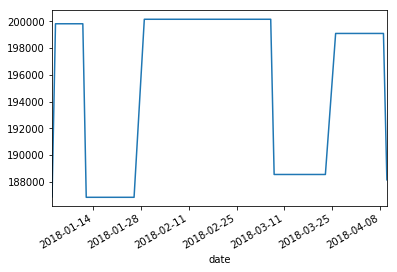

In [30]:
Account.daily_cash.cash.plot()

In [31]:
Risk=QA.QA_Risk(Account)

In [33]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'portfolio_cookie': 'port_test_1',
 'user_cookie': 'user_test_1',
 'annualize_return': -0.02,
 'profit': -0.0,
 'max_dropback': 0.01,
 'time_gap': 64,
 'volatility': 1.98,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.15,
 'bm_profit': -0.04,
 'beta': 0.01,
 'alpha': -0.02,
 'sharpe': -0.04,
 'sortino': -97.88,
 'init_cash': '199993.43',
 'last_assets': '199083.37',
 'total_tax': -36.85,
 'total_commission': -35.0,
 'profit_money': -910.06,
 'assets': [199993.42860347,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199817.04,
  199816.836173505,
  200439.24337002,
  200439.24337002,
  200467.96985601302,
  200937.16912723202,
  201013.77308988,
  200669.055257964,
  200870.14065991502,
  200860.565164584,
  200439.24337002,
  200295.61094005502,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.71000000002,
  200153.710

In [34]:
Risk.account.cash_table

,,cash,datetime,date,account_cookie
datetime,account_cookie,,,,
2018-01-02 00:00:00,JCSC_EXAMPLE,186875,2018-01-02 00:00:00,2018-01-02,JCSC_EXAMPLE
2018-01-03 00:00:00,JCSC_EXAMPLE,199817,2018-01-03 00:00:00,2018-01-03,JCSC_EXAMPLE
2018-01-12 00:00:00,JCSC_EXAMPLE,186842,2018-01-12 00:00:00,2018-01-12,JCSC_EXAMPLE
2018-01-29 00:00:00,JCSC_EXAMPLE,200154,2018-01-29 00:00:00,2018-01-29,JCSC_EXAMPLE
2018-03-08 00:00:00,JCSC_EXAMPLE,188549,2018-03-08 00:00:00,2018-03-08,JCSC_EXAMPLE
2018-03-26 00:00:00,JCSC_EXAMPLE,199093,2018-03-26 00:00:00,2018-03-26,JCSC_EXAMPLE
2018-04-10 00:00:00,JCSC_EXAMPLE,188148,2018-04-10 00:00:00,2018-04-10,JCSC_EXAMPLE


In [35]:
z=Account.cash_table.drop_duplicates(subset='date', keep='last')\
.set_index(['date', 'account_cookie'], drop=False)

In [36]:
z

,,cash,datetime,date,account_cookie
date,account_cookie,,,,
2018-01-02,JCSC_EXAMPLE,186875,2018-01-02 00:00:00,2018-01-02,JCSC_EXAMPLE
2018-01-03,JCSC_EXAMPLE,199817,2018-01-03 00:00:00,2018-01-03,JCSC_EXAMPLE
2018-01-12,JCSC_EXAMPLE,186842,2018-01-12 00:00:00,2018-01-12,JCSC_EXAMPLE
2018-01-29,JCSC_EXAMPLE,200154,2018-01-29 00:00:00,2018-01-29,JCSC_EXAMPLE
2018-03-08,JCSC_EXAMPLE,188549,2018-03-08 00:00:00,2018-03-08,JCSC_EXAMPLE
2018-03-26,JCSC_EXAMPLE,199093,2018-03-26 00:00:00,2018-03-26,JCSC_EXAMPLE
2018-04-10,JCSC_EXAMPLE,188148,2018-04-10 00:00:00,2018-04-10,JCSC_EXAMPLE


In [37]:
res=Account.cash_table.drop_duplicates(subset='date', keep='last')

zx=pd.concat([res.set_index('date'),pd.Series(data=None,index=pd.to_datetime(Account.trade_range),name='predrop')],axis=1)\
.ffill().drop(['predrop'],axis=1)

In [38]:
zxx=pd.to_datetime(Account.trade_range)

In [39]:
zxx.set_names('date')

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
               '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05',
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
      

In [42]:
Account.daily_hold.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
               '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-05',
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
      

In [43]:
Risk.market_value.sum(axis=1)

date
2018-01-02    13118.428603
2018-01-03        0.000000
2018-01-04        0.000000
2018-01-05        0.000000
2018-01-08        0.000000
2018-01-09        0.000000
2018-01-10        0.000000
2018-01-11        0.000000
2018-01-12    12974.796174
2018-01-15    13597.203370
2018-01-16    13597.203370
2018-01-17    13625.929856
2018-01-18    14095.129127
2018-01-19    14171.733090
2018-01-22    13827.015258
2018-01-23    14028.100660
2018-01-24    14018.525165
2018-01-25    13597.203370
2018-01-26    13453.570940
2018-01-29        0.000000
2018-01-30        0.000000
2018-01-31        0.000000
2018-02-01        0.000000
2018-02-02        0.000000
2018-02-05        0.000000
2018-02-06        0.000000
2018-02-07        0.000000
2018-02-08        0.000000
2018-02-09        0.000000
2018-02-12        0.000000
                  ...     
2018-02-26        0.000000
2018-02-27        0.000000
2018-02-28        0.000000
2018-03-01        0.000000
2018-03-02        0.000000
2018-03-05        0.000

In [44]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax,message,frozen,direction,total_frozen
0,2018-01-02 00:00:00,000001,13.12,1000.0,186875.00,Order_sxCLJ5p3,Order_sxCLJ5p3,Trade_q76vpTOk,JCSC_EXAMPLE,5,0.00,None,0,1,0
1,2018-01-03 00:00:00,000001,12.96,-1000.0,199817.04,Order_0VL9HsGQ,Order_0VL9HsGQ,Trade_dK2ScVtU,JCSC_EXAMPLE,5,12.96,None,0,-1,0
2,2018-01-12 00:00:00,000001,12.97,1000.0,186842.04,Order_9w5liMaI,Order_9w5liMaI,Trade_OavWXH47,JCSC_EXAMPLE,5,0.00,None,0,1,0
3,2018-01-29 00:00:00,000001,13.33,-1000.0,200153.71,Order_Rp5bg4aE,Order_Rp5bg4aE,Trade_iwp7yECH,JCSC_EXAMPLE,5,13.33,None,0,-1,0
4,2018-03-08 00:00:00,000001,11.60,1000.0,188548.71,Order_l234QRSh,Order_l234QRSh,Trade_0Zou23Cx,JCSC_EXAMPLE,5,0.00,None,0,1,0
5,2018-03-26 00:00:00,000001,10.56,-1000.0,199093.15,Order_g0I7itnA,Order_g0I7itnA,Trade_RDkfGB1b,JCSC_EXAMPLE,5,10.56,None,0,-1,0
6,2018-04-10 00:00:00,000001,10.94,1000.0,188148.15,Order_pGbMlcHA,Order_pGbMlcHA,Trade_RENcDSBy,JCSC_EXAMPLE,5,0.00,None,0,1,0


In [45]:
# Account.cash_table
Risk.assets

date
2018-01-02    199993.428603
2018-01-03    199817.040000
2018-01-04    199817.040000
2018-01-05    199817.040000
2018-01-08    199817.040000
2018-01-09    199817.040000
2018-01-10    199817.040000
2018-01-11    199817.040000
2018-01-12    199816.836174
2018-01-15    200439.243370
2018-01-16    200439.243370
2018-01-17    200467.969856
2018-01-18    200937.169127
2018-01-19    201013.773090
2018-01-22    200669.055258
2018-01-23    200870.140660
2018-01-24    200860.565165
2018-01-25    200439.243370
2018-01-26    200295.610940
2018-01-29    200153.710000
2018-01-30    200153.710000
2018-01-31    200153.710000
2018-02-01    200153.710000
2018-02-02    200153.710000
2018-02-05    200153.710000
2018-02-06    200153.710000
2018-02-07    200153.710000
2018-02-08    200153.710000
2018-02-09    200153.710000
2018-02-12    200153.710000
                  ...      
2018-02-26    200153.710000
2018-02-27    200153.710000
2018-02-28    200153.710000
2018-03-01    200153.710000
2018-03-02    2

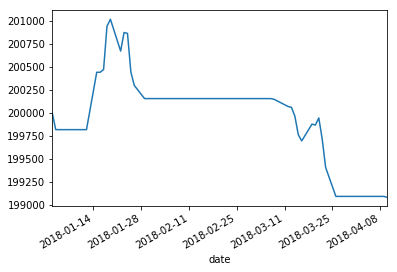

In [46]:
Risk.assets.plot()

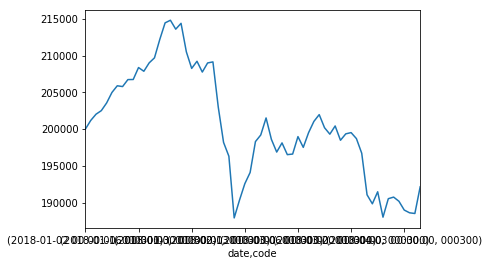

In [48]:
Risk.benchmark_assets.plot()

In [49]:
Risk.profit_construct

{'total_buyandsell': -838.21,
 'total_tax': -36.85,
 'total_commission': -35.0,
 'total_profit': -910.06}

In [50]:
Performance=QA.QA_Performance(Account)

In [51]:
Performance.pnl_fifo

,sell_date,buy_date,amount,sell_price,buy_price,rawdirection,unit,pnl_ratio,pnl_money,hold_gap,if_buyopen,openprice,opendate,closeprice,closedate
code,,,,,,,,,,,,,,,
000001,2018-01-03,2018-01-02,1000.0,12.96,13.12,buy,1.0,-0.012195,-160.0,1 days,True,13.12,2018-01-02 00:00:00,12.96,2018-01-03 00:00:00
000001,2018-01-29,2018-01-12,1000.0,13.33,12.97,buy,1.0,0.027756,360.0,17 days,True,12.97,2018-01-12 00:00:00,13.33,2018-01-29 00:00:00
000001,2018-03-26,2018-03-08,1000.0,10.56,11.60,buy,1.0,-0.089655,-1040.0,18 days,True,11.60,2018-03-08 00:00:00,10.56,2018-03-26 00:00:00


In [53]:
Performance.plot_pnlmoney(Performance.pnl_fifo)

TypeError: plot_pnlmoney() takes 1 positional argument but 2 were given

# STEP6: 存储结果

In [54]:
Account.save()
Risk.save()

# STEP7: 查看存储的结果

In [55]:
account_info=QA.QA_fetch_account({'account_cookie':'JCSC_EXAMPLE'})

In [58]:
account_info

[{'account_cookie': 'JCSC_EXAMPLE',
  'portfolio_cookie': 'port_test_1',
  'user_cookie': 'user_test_1',
  'allow_margin': False,
  'allow_sellopen': False,
  'allow_t0': False,
  'broker': 'backtest',
  'cash': [200000,
   186875.0,
   199817.04,
   186842.04,
   200153.71000000002,
   188548.71000000002,
   199093.15000000002,
   188148.15000000002],
  'commission_coeff': 0.00025,
  'current_time': 'None',
  'end_date': '2018-04-10',
  'finished_id': ['Order_sxCLJ5p3',
   'Order_0VL9HsGQ',
   'Order_9w5liMaI',
   'Order_Rp5bg4aE',
   'Order_l234QRSh',
   'Order_g0I7itnA',
   'Order_pGbMlcHA'],
  'frequence': 'day',
  'frozen': {},
  'history': [['2018-01-02 00:00:00',
    '000001',
    13.12,
    1000.0,
    186875.0,
    'Order_sxCLJ5p3',
    'Order_sxCLJ5p3',
    'Trade_q76vpTOk',
    'JCSC_EXAMPLE',
    5,
    0,
    None,
    0,
    1,
    0],
   ['2018-01-03 00:00:00',
    '000001',
    12.96,
    -1000.0,
    199817.04,
    'Order_0VL9HsGQ',
    'Order_0VL9HsGQ',
    'Trade_dK2

In [57]:
account=QA.QA_Account().from_message(account_info)

TypeError: __init__() missing 2 required positional arguments: 'user_cookie' and 'portfolio_cookie'